<a href="https://colab.research.google.com/github/fwitschel/ML/blob/main/notebooks/FixIt_in_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Execute this code only if in colab
if 'COLAB_GPU' in os.environ:
  print("Executing in Colab!")
  # Cloning GitHub repository
  !git clone https://github.com/fwitschel/ML.git
  %cd ML


Executing in Colab!
Cloning into 'ML'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 1.19 MiB | 2.93 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/ML


In [13]:
import numpy as np

# Mit pandas kann man z.B. einfach Daten aus csv-Dateien laden und verarbeiten.
# Sie landen dann in einem "Data Frame"...
import pandas as pd

# Wir wollen einen Entscheidungsbaum verwenden - es gibt einen in
# Scikit learn:
from sklearn.tree import DecisionTreeClassifier

# Bibliotheken für die Evaluation:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Visualisierung des Entscheidungsbaums
from sklearn import tree
from matplotlib import pyplot as plt

Wir laden die Daten und lassen uns die ersten Zeilen anzeigen:

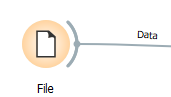

In [3]:
fixit = pd.read_csv("/content/ML/data/fixit.csv")
fixit.head()

,Agent Experience,Agent ID,Agent Name,Customer ID,Customer Type,Number of Records,Priority,Problem Category,SLAFullfillment,Satisfaction,Severity,Ticket Type,Days Open,Ticket Nr
0,1,3,John,1929,1 - MyProduct_Light,1,0 - Unassigned,Systems,IN_RANGE,1 - Unsatisfied,2 - Normal,Issue,3,1
1,4,8,Kim,1587,2 - MyProduct_Pro,1,1 - Low,Software,IN_RANGE,1 - Unsatisfied,1 - Minor,Request,5,2
2,2,6,Cindy,925,2 - MyProduct_Pro,1,0 - Unassigned,Access/Login,IN_RANGE,0 - Unknown,2 - Normal,Request,0,3
3,2,4,Jane,413,4 - MyProduct_Doku,1,0 - Unassigned,Systems,SLA_VIOLATION,0 - Unknown,2 - Normal,Request,20,4
4,2,4,Jane,318,1 - MyProduct_Light,1,1 - Low,Access/Login,IN_RANGE,1 - Unsatisfied,2 - Normal,Request,1,5


Wir machen die Feature Selection und Definition des Klassenattributs:
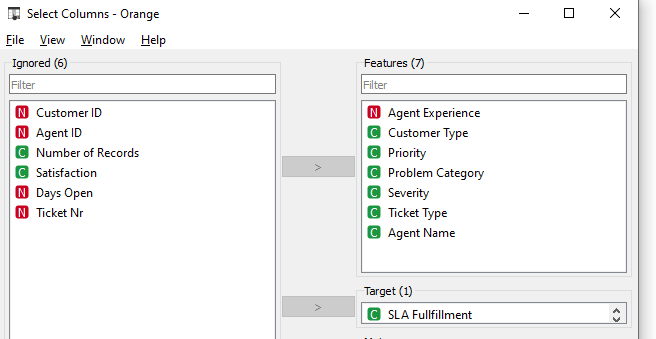

In [6]:
feature_cols = ['Agent Experience','Agent Name','Customer Type','Priority','Problem Category','Ticket Type','Severity']

# Die Tabelle mit den Features heisst in Python oft "X"
X = fixit[feature_cols]

# Das Klassenattribut / die Zielvariable wird in Python gern "y" genannt
y = fixit.SLAFullfillment

Der Entscheidungsbaum-Algorithmus in Scikit Learn akzeptiert nur numerische Attribute (eigentlich alle Algorithmen in Scikit learn...). Wir müssen die kategorialen also One-hot-kodieren:

In [7]:
one_hot_X = pd.get_dummies(X)
one_hot_X.head()

,Agent Experience,Agent Name_Chris,Agent Name_Cindy,Agent Name_Fred,Agent Name_Jane,Agent Name_John,Agent Name_Kate,Agent Name_Kim,Agent Name_Lisa,Agent Name_Tom,...,Problem Category_Hardware,Problem Category_Software,Problem Category_Systems,Ticket Type_Issue,Ticket Type_Request,Severity_0 - Unclassified,Severity_1 - Minor,Severity_2 - Normal,Severity_3 - Major,Severity_4 - Critical
0,1,False,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,4,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
2,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,2,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
4,2,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


Wir legen einen Entscheidungsbaum mit maximaler Tiefe 3 an:

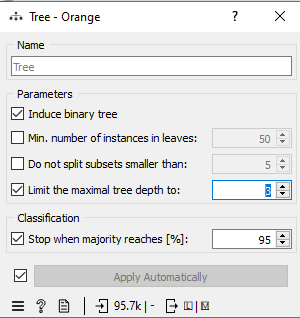

In [8]:
dtree = DecisionTreeClassifier(max_depth=3)

Dann kümmern wir uns darum, die Daten in Trainings- und Testmenge aufzuteilen und den Entscheidungsbaum auf der Trainingsmenge zu trainieren:

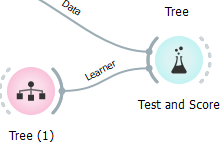
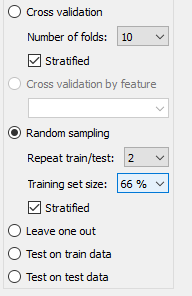

In [11]:
# Aufteilung der Daten und Trainieren des Baums auf den Trainingsdaten
X_train, X_test, y_train, y_test = train_test_split(one_hot_X,y,test_size=0.33)
dtree = dtree.fit(X_train,y_train)

# Vorhersagen des Modells auf den Testdaten:
y_pred_tree = dtree.predict(X_test)

# Berechnen und Ausgabe der Accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.850957429973097


Visualisierung des Baums:

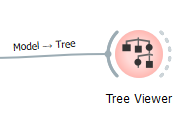

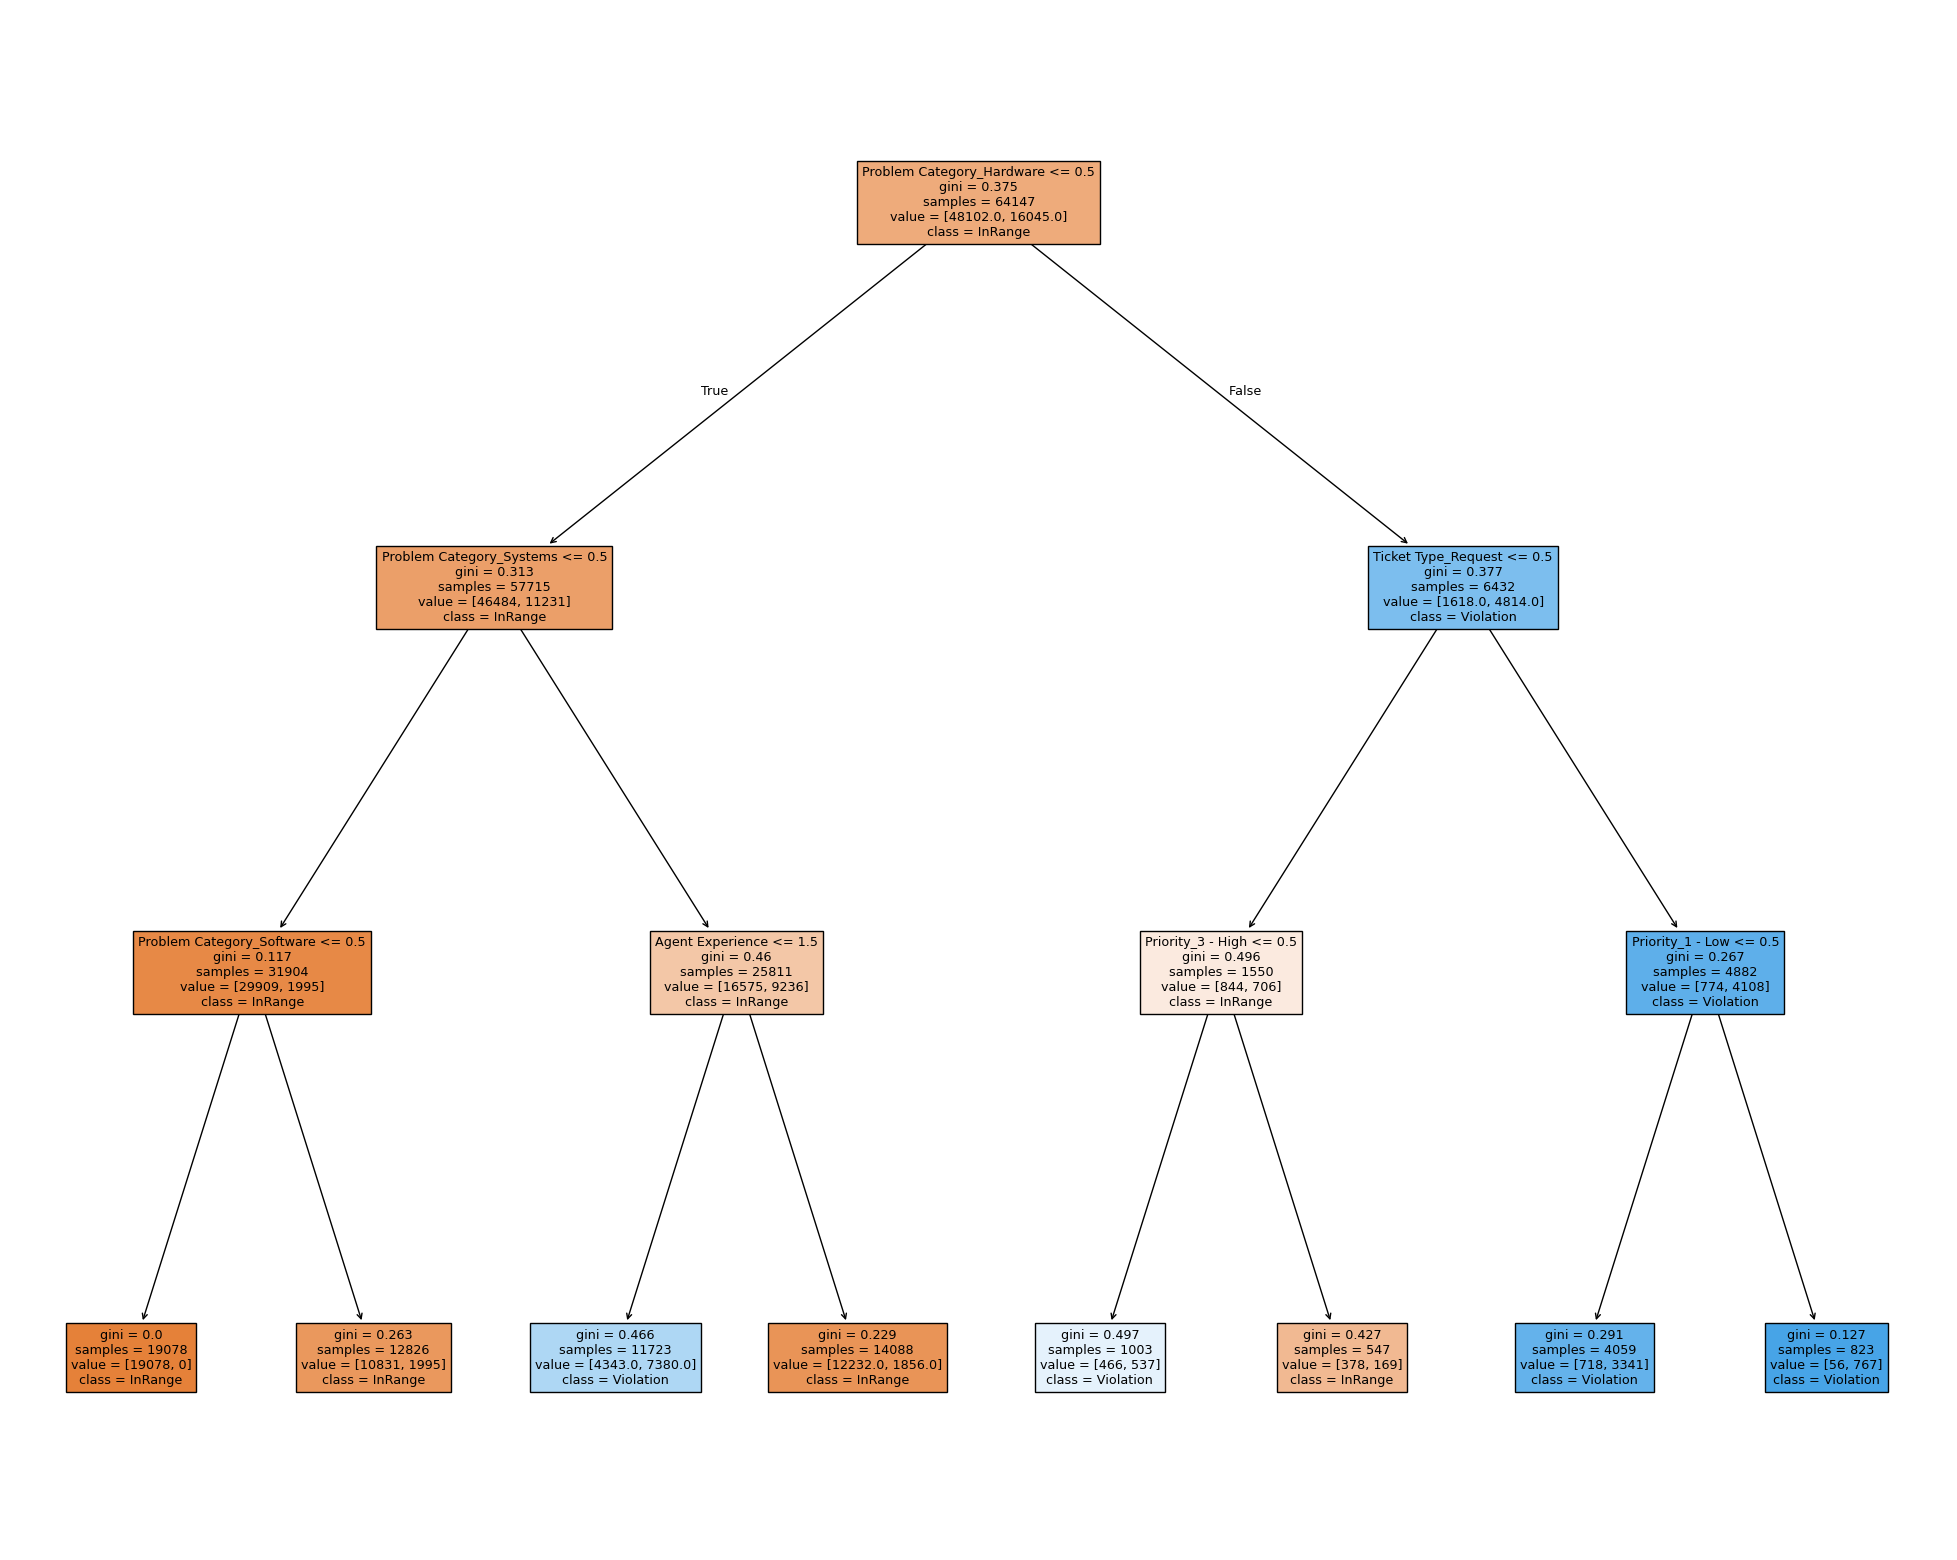

In [14]:
# finally, let's visualise this :
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names=one_hot_X.columns.values,
                   class_names=['InRange','Violation'],
                   filled=True)